In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# model the Bo coil 

board_lenth = 0.929                # length of the octogon face [in m]
i_inner     = 3.5e-3               # inner current 
r_ploy = board_lenth/(2*np.tan(np.pi/8))  # radius (to approximate the octagon)

z_5 = np.arange(19,71,3)           # coil section 5 
z_6 = np.arange(108,361,3)         # coil section 6
z_7 = np.arange(560,711,3)         # coil section 7
z_8 = np.arange(915,1066,3)        # coil section 8 

z_1 = -1*z_8                       # coil section 1 
z_2 = -1*z_7                       # coil section 2 
z_3 = -1*z_6                       # coil section 3 
z_4 = -1*z_5                       # coil section 4 

In [3]:
# array of wire poisions(along z axis) [distances in m]
z_outer = np.concatenate([z_1,z_2,z_7,z_8])*1e-3   # outer coil section 
z_inner = np.concatenate([z_3,z_4,z_5,z_6])*1e-3   # inner coil section 

In [4]:
# field at(x,y,z) created by ploygon [field in mG]
def polygon_field(x,y,z,zo,N=8,R=1,I=1):
  r = np.sqrt(x**2 + y**2 + (z-zo)**2)
  theta_n = 2*np.pi*(np.arange(0,N-1))/N
  H_plus  = np.sqrt(r**2 + (np.arccos(np.pi/N))**2 -2*(x*np.cos(theta_n)+y*np.sin(theta_n))
          + 2*(x*np.sin(theta_n)- y*np.cos(theta_n))*np.tan(np.pi/N))
  H_minus = np.sqrt(r**2 + (np.arccos(np.pi/N))**2 -2*(x*np.cos(theta_n)+y*np.sin(theta_n)) 
          - 2*(x*np.sin(theta_n)- y*np.cos(theta_n))*np.tan(np.pi/N))
  
  U = ((np.tan(np.pi/N) + (x*np.sin(theta_n)-y*np.cos(theta_n)))/H_plus +
  (np.tan(np.pi/N) - (x*np.sin(theta_n)-y*np.cos(theta_n)))/H_minus)/((1-x*np.cos(theta_n)-y*np.sin(theta_n))**2 + (z-zo)**2)

  U = U*I/R
  return np.sum(U*(z-zo)*np.cos(theta_n)), np.sum(U*(z-zo)*np.sin(theta_n)),np.sum(U*(1-x*np.cos(theta_n)-y*np.sin(theta_n)))

In [6]:
# total feild created by polygons along z 
def total_field(x,y,z,R=r_ploy,I=i_inner,N=8,cuurent_ratio=1.75,inner_z=z_inner,outer_z=z_outer):
  inner_field = np.sum(np.array([polygon_field(x,y,z,i,N,R,I) for i in inner_z]),axis=0)
  outer_field = np.sum(np.array([polygon_field(x,y,z,i,N,R,I) for i in outer_z]),axis=0)
  total_field = inner_field + cuurent_ratio*outer_field
  return total_field

In [8]:
total_field(0,0,0)  # field at origin 

array([ 2.28766658e-17, -1.94072189e-17,  5.79575056e+00])

Text(0.5, 0, 'z(m)')

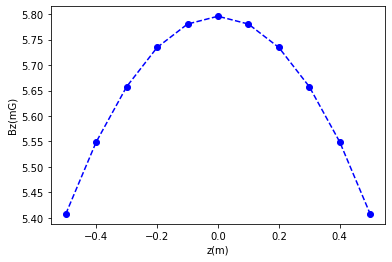

In [21]:
# plot the Bz vs z
Bzz = lambda z:total_field(0,0,z)
z   = np.linspace(-0.5,0.5,11)
B_z = np.array(list(map(Bzz,z)))
plt.plot(z,B_z[:,2],'bo--')
plt.ylabel('Bz(mG)')
plt.xlabel('z(m)')